In [27]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("NonHermitianQW"))))

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import eig
from scipy.linalg import expm
from operators import op


<h1>Description</h1>

Here we study a very simple model of 2 dimensional, non-Hermitian Hamiltonian, that takes form of:
$$
H = \kappa \sigma_{x} + \gamma \sigma_{z}
$$
In matrix form it can be written as:
$$
H = \left[\begin{array}{cc}
\gamma & \kappa \\
\kappa & -\gamma \\
\end{array}\right]
$$
Characteristic equation for this Hamiltonian is:
$$
\lambda^{2} - \gamma^{2} - \kappa^{2} = 0
$$
which gives us two eigenvalues:
$$
\lambda = \pm \sqrt{\gamma^{2}+\kappa^{2}}
$$
with respect to two right eigenvectors listed below:
$$
|\psi^{R}_{\pm} \rangle  = \left[\begin{array}{c}
\kappa \\
\gamma\mp \sqrt{\gamma^{2}+\kappa^{2}}
\end{array}\right]
$$
which are not normalized. It's obvious that for $\kappa = \pm i \gamma$, we obtain secodn order exceptional point.

<h1>Visualization</h1>

From this point, we take the value of $\gamma$ to be equal to $1/2$. 

In [29]:
H_ = lambda k_,g_ : k_ * op.sx + g_ * op.sz
Spectrum = np.vectorize(lambda k_,g_,i_ : eig(H_(k_,g_))[0][i_])

In [30]:
k_ = 1/2
re_g = np.arange(-1,1,0.01)
im_g = np.arange(-1,1,0.01)
re_g,im_g = np.meshgrid(re_g,im_g)
g_ = re_g + 1j * im_g 

E0,E1 = Spectrum(k_,g_,0),Spectrum(k_,g_,1)


In [31]:
def plot_surfaces(ax,E0,E1,g_,c_ = "red",a_ = 0.5):
    ax.plot_surface(np.real(g_),np.imag(g_),E0,color = c_,alpha = a_)
    ax.plot_surface(np.real(g_),np.imag(g_),E1,color = c_,alpha = a_)
    ax.set_xlabel(r"Re[$\gamma$]")
    ax.set_ylabel(r"Im[$\gamma$]")

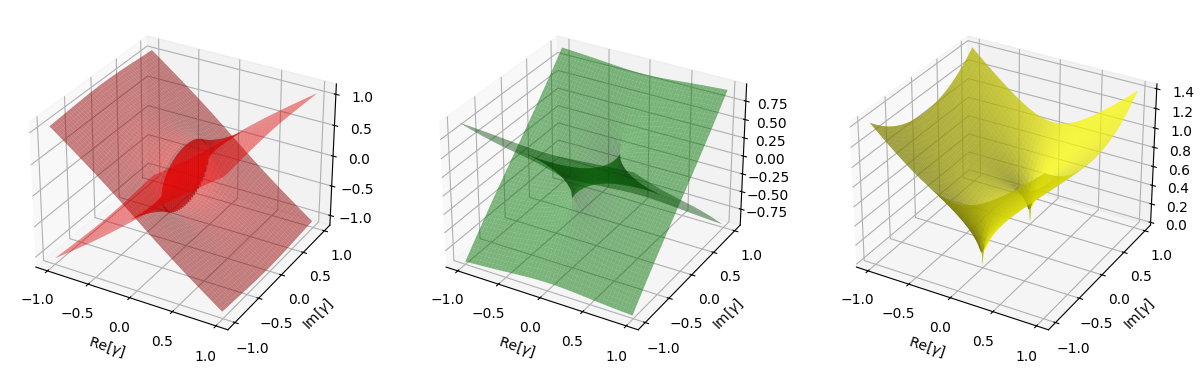

In [39]:
%matplotlib qt
%matplotlib inline

fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(131,projection = "3d")
plot_surfaces(ax1,np.real(E0),np.real(E1),g_,c_ = "red",a_ = 0.5)

ax2 = fig.add_subplot(132,projection = "3d")
plot_surfaces(ax2,np.imag(E0),np.imag(E1),g_,c_ = "green",a_ = 0.5)

ax3 = fig.add_subplot(133,projection = "3d")
plot_surfaces(ax3,np.abs(E0),np.abs(E1),g_,c_ = "yellow",a_ = 0.5)

plt.show()

<h1>Encircling exceptional point</h1>

In [34]:
th_ = np.arange(0,2*np.pi,0.1)
r0 = 1j/2
rr = 0.3
z = r0 + rr * np.exp(1j* th_)
x_ = np.real(z)
y_ = np.imag(z)

R_ = np.abs(1/4+z**2)
arg = np.angle(1/4+z**2)

Im_f = np.sqrt(R_)*np.sin(arg/2)
Re_f = np.sqrt(R_)*np.cos(arg/2)

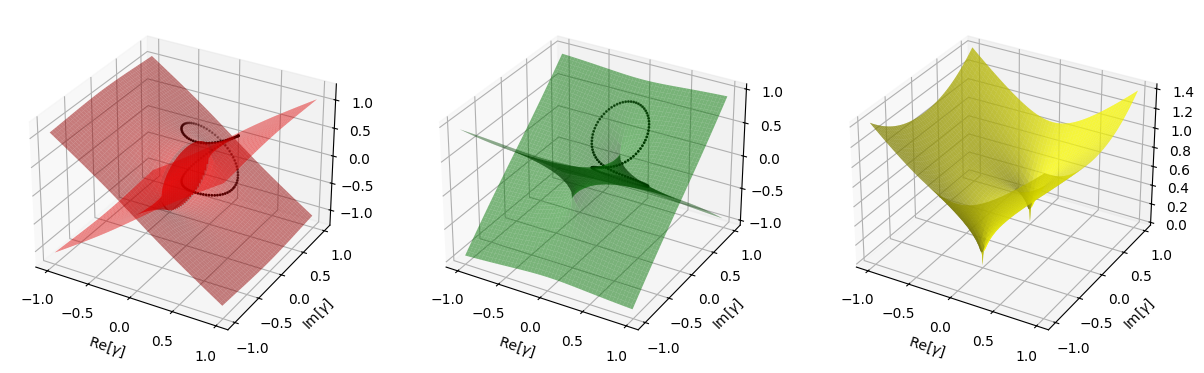

In [40]:
%matplotlib qt
%matplotlib inline

fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(131,projection = "3d")
plot_surfaces(ax1,np.real(E0),np.real(E1),g_,c_ = "red",a_ = 0.5)
ax1.scatter(x_,y_,Re_f,color="black",s = 1)
ax1.scatter(x_,y_,-Re_f,color="black",s = 1)

ax2 = fig.add_subplot(132,projection = "3d")
plot_surfaces(ax2,np.imag(E0),np.imag(E1),g_,c_ = "green",a_ = 0.5)
ax2.scatter(x_,y_,Im_f,color="black",s = 1)
ax2.scatter(x_,y_,-Im_f,color="black",s = 1)

ax3 = fig.add_subplot(133,projection = "3d")
plot_surfaces(ax3,np.abs(E0),np.abs(E1),g_,c_ = "yellow",a_ = 0.5)

plt.show()